<a href="https://colab.research.google.com/github/siddhartha-alexander/Nexora-Internship-Assignment/blob/main/Nexora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why AI at Nexora?**


I believe fashion is more than just style — it’s a language of self-expression, and AI has the power to translate those emotions into truly personalized experiences. What draws me to Nexora is its focus on creativity and personalization, where technology meets individuality. My goal is to design intuitive machine learning systems that make product discovery feel natural, human, and delightful. This prototype reflects that vision — using embeddings to connect feelings and fashion, turning simple data into meaningful, emotion-driven shopping experiences.

In [30]:
!pip install -q sentence-transformers scikit-learn matplotlib pandas

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import time
import timeit
import pickle
import os
%matplotlib inline


In [23]:
data = [
    {
        "id": 1,
        "name": "Boho Sunset Dress",
        "desc": "A breezy, flowy dress in warm earthy tones — perfect for sunset festivals or beach getaways. It gives that effortless bohemian charm.",
        "vibes": ["boho", "free-spirited", "summer"]
    },
    {
        "id": 2,
        "name": "Urban Street Hoodie",
        "desc": "An oversized cotton hoodie with bold prints and a relaxed fit — made for late-night drives and city walks. Streetwear meets comfort.",
        "vibes": ["urban", "casual", "cool"]
    },
    {
        "id": 3,
        "name": "Midnight Chic Blazer",
        "desc": "A sleek black blazer tailored for confidence. Whether it’s an office meeting or a dinner date, it adds instant class to your look.",
        "vibes": ["formal", "chic", "elegant"]
    },
    {
        "id": 4,
        "name": "Cloud Knit Sweater",
        "desc": "Soft, fluffy, and endlessly cozy — this wool sweater feels like a warm hug on a cold morning. Perfect for coffee and comfort days.",
        "vibes": ["cozy", "warm", "relaxed"]
    },
    {
        "id": 5,
        "name": "Momentum Joggers",
        "desc": "Stretch-fit joggers built for movement and style. From gym sessions to airport runs, they keep you comfy and confident all day.",
        "vibes": ["sporty", "energetic", "active"]
    },
    {
        "id": 6,
        "name": "Retro Denim Jacket",
        "desc": "Classic blue denim reimagined — slightly faded with that lived-in vibe. Throw it over anything for a timeless, laid-back look.",
        "vibes": ["cool", "streetwear", "vintage"]
    },
    {
        "id": 7,
        "name": "Blossom Maxi Skirt",
        "desc": "A flowing floral maxi skirt that dances with every step. Light, feminine, and perfect for a sunny brunch or a garden stroll.",
        "vibes": ["boho", "romantic", "feminine"]
    },
    {
        "id": 8,
        "name": "Aurora Silk Top",
        "desc": "A soft pastel silk top that feels luxurious on the skin. Ideal for evenings out or weekend getaways — elegant yet easygoing.",
        "vibes": ["chic", "elegant", "minimal"]
    },
    {
        "id": 9,
        "name": "Trailblazer Cargo Pants",
        "desc": "Durable yet stylish cargo pants made for explorers. Pairs well with sneakers or boots — adventure-ready fashion.",
        "vibes": ["outdoor", "rugged", "utility"]
    },
    {
        "id": 10,
        "name": "Luna Satin Dress",
        "desc": "A glossy satin dress that glows under the lights — for moments when you want to feel confident, classy, and unforgettable.",
        "vibes": ["party", "chic", "bold"]
    }
]

df = pd.DataFrame(data)
df = df[["id", "name", "desc", "vibes"]]
df.index = np.arange(1, len(df) + 1)
df.head(10)


,id,name,desc,vibes
1,1,Boho Sunset Dress,"A breezy, flowy dress in warm earthy tones — p...","[boho, free-spirited, summer]"
2,2,Urban Street Hoodie,An oversized cotton hoodie with bold prints an...,"[urban, casual, cool]"
3,3,Midnight Chic Blazer,A sleek black blazer tailored for confidence. ...,"[formal, chic, elegant]"
4,4,Cloud Knit Sweater,"Soft, fluffy, and endlessly cozy — this wool s...","[cozy, warm, relaxed]"
5,5,Momentum Joggers,Stretch-fit joggers built for movement and sty...,"[sporty, energetic, active]"
6,6,Retro Denim Jacket,Classic blue denim reimagined — slightly faded...,"[cool, streetwear, vintage]"
7,7,Blossom Maxi Skirt,A flowing floral maxi skirt that dances with e...,"[boho, romantic, feminine]"
8,8,Aurora Silk Top,A soft pastel silk top that feels luxurious on...,"[chic, elegant, minimal]"
9,9,Trailblazer Cargo Pants,Durable yet stylish cargo pants made for explo...,"[outdoor, rugged, utility]"
10,10,Luna Satin Dress,A glossy satin dress that glows under the ligh...,"[party, chic, bold]"


In [22]:
EMBED_MODEL_NAME = "all-MiniLM-L6-v2"
model = SentenceTransformer(EMBED_MODEL_NAME)
print("Loaded model:", EMBED_MODEL_NAME)


Loaded model: all-MiniLM-L6-v2


In [25]:
EMB_SAVE_PATH = "embeddings.pkl"

def compute_and_save_embeddings(df, desc_col="desc", save_path=EMB_SAVE_PATH):
    if os.path.exists(save_path):
        print("Loading saved embeddings from", save_path)
        with open(save_path, "rb") as f:
            stored = pickle.load(f)
        emb_map = stored["emb_map"]
        df["embedding"] = df["id"].apply(lambda i: np.array(emb_map[i]))
        return df
    else:
        print("Computing embeddings for the first time... (this may take a few seconds)")
        embeddings = model.encode(df[desc_col].tolist(), show_progress_bar=True)
        emb_map = {row["id"]: emb for row, emb in zip(df.to_dict(orient="records"), embeddings)}
        with open(save_path, "wb") as f:
            pickle.dump({"emb_map": emb_map}, f)
        df["embedding"] = df["id"].apply(lambda i: np.array(emb_map[i]))
        print("Embeddings computed and saved to", save_path)
        return df

df = compute_and_save_embeddings(df)
df.head(3)


Loading saved embeddings from embeddings.pkl


,id,name,desc,vibes,embedding
1,1,Boho Sunset Dress,"A breezy, flowy dress in warm earthy tones — p...","[boho, free-spirited, summer]","[-0.018030308, 0.024536334, 0.07455647, 0.0243..."
2,2,Urban Street Hoodie,An oversized cotton hoodie with bold prints an...,"[urban, casual, cool]","[-0.018953014, 0.06907801, 0.04216051, 0.07818..."
3,3,Midnight Chic Blazer,A sleek black blazer tailored for confidence. ...,"[formal, chic, elegant]","[-0.11166917, 0.11137432, -0.0017134063, 0.099..."


In [26]:
SIM_THRESHOLD = 0.30
GOOD_THRESHOLD = 0.70

def safe_cosine(a, b):
    try:
        return float(cosine_similarity([a], [b])[0][0])
    except Exception:
        return 0.0

def vibe_matcher(query, top_k=3, show_output=True):
    query = str(query).strip()
    if len(query) == 0:
        if show_output:
            print("Empty query received — please type something like 'cozy weekend outfit' or 'boho festival look'.")
        return pd.DataFrame()
    query_emb = model.encode(query)
    sims = df["embedding"].apply(lambda e: safe_cosine(query_emb, e))
    df_temp = df.copy()
    df_temp["similarity"] = sims
    df_sorted = df_temp.sort_values("similarity", ascending=False).reset_index(drop=True)
    top = df_sorted.head(top_k)
    if show_output:
        print(f"\nTop {top_k} matches for query: \"{query}\"")
        if top["similarity"].max() < SIM_THRESHOLD:
            print("⚠️ No strong vibe match found (all similarities are low).")
            print("Suggestion: Try a clearer or slightly longer query (e.g., 'cozy sweater for autumn coffee', 'bold party dress').")
        for idx, row in top.iterrows():
            print(f"\n{idx+1}. {row['name']}  —  sim={row['similarity']:.3f}")
            print("   ", row['desc'])
            print("   Vibes:", ", ".join(row['vibes']))
    return top


In [27]:
queries = [
    "energetic urban chic",
    "cozy weekend outfit for coffee",
    "boho festival outfit with flowy skirt"
]

results = []
for q in queries:
    def run_query():
        vibe_matcher(q, top_k=3, show_output=False)
    latency = timeit.timeit(run_query, number=1)
    top_matches = vibe_matcher(q, top_k=3, show_output=True)
    avg_sim = top_matches["similarity"].mean() if not top_matches.empty else 0.0
    good_count = (top_matches["similarity"] > GOOD_THRESHOLD).sum()
    results.append({
        "query": q,
        "avg_similarity": float(avg_sim),
        "best_similarity": float(top_matches["similarity"].max()) if not top_matches.empty else 0.0,
        "good_matches_count": int(good_count),
        "latency_sec": float(latency)
    })

metrics_df = pd.DataFrame(results)
print("\n=== Metrics summary ===")
metrics_df



Top 3 matches for query: "energetic urban chic"
⚠️ No strong vibe match found (all similarities are low).
Suggestion: Try a clearer or slightly longer query (e.g., 'cozy sweater for autumn coffee', 'bold party dress').

1. Urban Street Hoodie  —  sim=0.272
    An oversized cotton hoodie with bold prints and a relaxed fit — made for late-night drives and city walks. Streetwear meets comfort.
   Vibes: urban, casual, cool

2. Boho Sunset Dress  —  sim=0.270
    A breezy, flowy dress in warm earthy tones — perfect for sunset festivals or beach getaways. It gives that effortless bohemian charm.
   Vibes: boho, free-spirited, summer

3. Blossom Maxi Skirt  —  sim=0.257
    A flowing floral maxi skirt that dances with every step. Light, feminine, and perfect for a sunny brunch or a garden stroll.
   Vibes: boho, romantic, feminine

Top 3 matches for query: "cozy weekend outfit for coffee"

1. Midnight Chic Blazer  —  sim=0.425
    A sleek black blazer tailored for confidence. Whether it’s a

,query,avg_similarity,best_similarity,good_matches_count,latency_sec
0,energetic urban chic,0.266123,0.272164,0,0.041735
1,cozy weekend outfit for coffee,0.421225,0.425423,0,0.024459
2,boho festival outfit with flowy skirt,0.495705,0.535036,0,0.022439


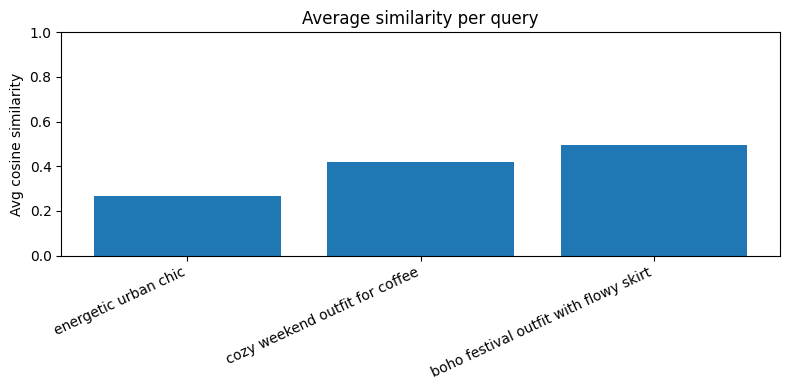

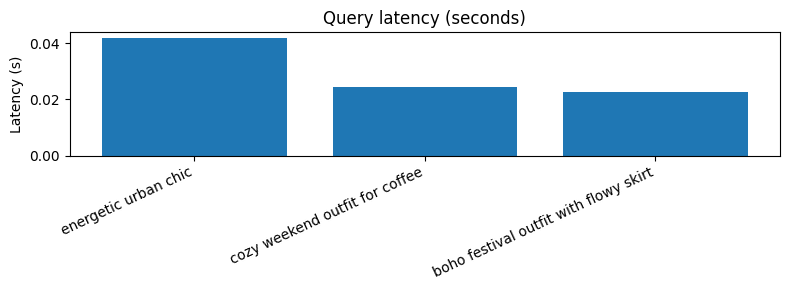

In [28]:
plt.figure(figsize=(8,4))
plt.bar(metrics_df["query"], metrics_df["avg_similarity"])
plt.ylim(0,1)
plt.title("Average similarity per query")
plt.ylabel("Avg cosine similarity")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,3))
plt.bar(metrics_df["query"], metrics_df["latency_sec"])
plt.title("Query latency (seconds)")
plt.ylabel("Latency (s)")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


In [29]:
metrics_df.to_csv("vibe_matcher_metrics.csv", index=False)
df.to_pickle("vibe_matcher_products_with_embeddings.pkl")
print("Saved: vibe_matcher_metrics.csv and vibe_matcher_products_with_embeddings.pkl")


Saved: vibe_matcher_metrics.csv and vibe_matcher_products_with_embeddings.pkl
